# Intro Data Science

# Andrés Nieto Guadarrama

In [2]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

1. Usando el API de `AlphaVantage` descarga la información histórica de precios diaria (`TIME_SERIES_DAILY`) para los siguientes 5 tickers: `["GOOGL", "MSFT", "AAPL", "TSLA", "AMZN"]`

```
{'GOOGL': {'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'GOOGL', '3. Last Refreshed': '2020-01-13 14:48:47', '4. Output Size': 'Full size', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2020-01-13': {'1. open': '1435.2500', '2. high': '1439.8900', '3. low': '1425.3700', '4. close': '1437.2850', '5. volume': '782014'}, '2020-01-10': {'1. open': '1429.4700', '2. high': '1434.9400', '3. low': '1419.6000', '4. close': '1428.9600', '5. volume': '1313178'}, '2020-01-09': {'1. open': '1421.9300', '2. high': '1428.6800', '3. low': '1410.2100', '4. close': '1419.7900', '5. volume': '1661438'}, '2020-01-08': {'1. open': '1394.8200', '2. high': '1411.8500', '3. low': '1392.6300', '4. close': '1405.0400...
```

# Ejs 1 y 2

In [92]:
url = "https://www.alphavantage.co"
base_url = "https://www.alphavantage.co/query"
# Cargamos el API Key de Alpha Vantage
avkey = 'UOGXB0ZV5BN965ES'
l_tickers=["MSFT", "AAPL", "TSLA", "AMZN"]

day = {
    "function": "TIME_SERIES_DAILY",
    "symbol":"GOOGL",
    "apikey": avkey
}
r = requests.get(base_url, params=day)
data=r.json()
df_close=pd.DataFrame(data['Time Series (Daily)']).T
df_close=df_close.rename(columns={'4. close':'GOOGL'})
df=df_close['GOOGL']

for t in l_tickers:
    day = {
    "function": "TIME_SERIES_DAILY",
    "symbol":t,
    "outputsize":"full",
    "apikey": avkey
    }
    r = requests.get(base_url, params=day)
    data=r.json()
    df_close=pd.DataFrame(data['Time Series (Daily)']).T
    df_close=df_close.rename(columns={'4. close':t})
    df_aux=df_close[t]
    df=pd.concat([df, df_aux], axis=1)

C:\Users\AN012491\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



2. Con la información descargada previamente, crea un pandas DataFrame de precios de cierre (`4. close`). Cada columna de `df` deberá ser el el nombre de cada ticker.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>GOOGL</th>      <th>MSFT</th>      <th>AAPL</th>      <th>TSLA</th>      <th>AMZN</th>    </tr>  </thead>  <tbody>    <tr>      <th>2020-01-13</th>      <td>1437.2850</td>      <td>162.8700</td>      <td>314.5000</td>      <td>516.9657</td>      <td>1894.2900</td>    </tr>    <tr>      <th>2020-01-10</th>      <td>1428.9600</td>      <td>161.3400</td>      <td>310.3300</td>      <td>478.1500</td>      <td>1883.1600</td>    </tr>    <tr>      <th>2020-01-09</th>      <td>1419.7900</td>      <td>162.0900</td>      <td>309.6300</td>      <td>481.3400</td>      <td>1901.0500</td>    </tr>    <tr>      <th>2020-01-08</th>      <td>1405.0400</td>      <td>160.0900</td>      <td>303.1900</td>      <td>492.1400</td>      <td>1891.9700</td>    </tr>    <tr>      <th>2020-01-07</th>      <td>1395.1100</td>      <td>157.5800</td>      <td>298.3900</td>      <td>469.0600</td>      <td>1906.8600</td>    </tr>  </tbody></table>


In [93]:
import datetime
from datetime import datetime
l_tickers.append('GOOGL')
date_index=pd.to_datetime(df.index)
df.index=date_index
df['indice']=df.index
df=df.sort_values(by=['indice'],ascending=False)
df=df[l_tickers]
df=df.astype(float)
df

,MSFT,AAPL,TSLA,AMZN,GOOGL
2020-01-15,163.18,311.34,518.50,1862.02,1439.20
2020-01-14,162.13,312.68,537.92,1869.44,1430.59
2020-01-13,163.28,316.96,524.86,1891.30,1440.03
2020-01-10,161.34,310.33,478.15,1883.16,1428.96
2020-01-09,162.09,309.63,481.34,1901.05,1419.79
...,...,...,...,...,...
2000-01-20,106.00,113.50,NaN,64.75,NaN
2000-01-19,107.00,106.56,NaN,66.81,NaN
2000-01-18,115.31,103.94,NaN,64.13,NaN
2000-01-14,112.25,100.44,NaN,64.25,NaN


3. Crea una gráfica del 2012 a la última observación de los precios de cierre para cada uno de los tickers

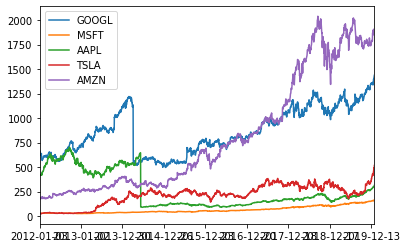

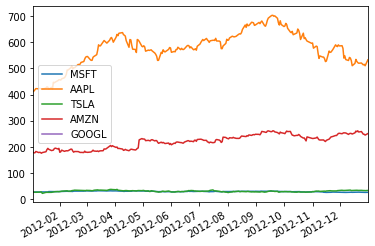

In [95]:
df.loc["2012"].plot()

**Para los siguientes ejercicios utiliza información del 2018 a la fecha**

4. Calcula el rendimiento esperado diario de cada emisora

In [ ]:
df2=df.shift(periods=1)
rend=(df-df2)/df
md=rend.resample("D").mean()

5. Calcula el rendimiento esperado anual de cada emisora

In [ ]:
my=rend.resample("Y").mean()

6. Dado los siguientes ponderadores, calcula el rendimiento esperado diario del portafolio

In [ ]:
# Generación de ponderadores aleatorios
seed(314)
w = np.random.random(size=5)
w = w / w.sum()

In [ ]:
rendimiento_esperado_diario=np.dot(w,md)*252

7. Dado ponderadores $w$, calcula el rendimiento esperado anual del portafolio

In [ ]:
rendimiento_esperado_anual=np.dot(w,my)*2

8. Calcula la matriz de variaza/covarianza

9. Calcula la varianza anual del portafolio

10. Calcula la desviación estándar anual del portafolio

11. Para cada ticker, calcula la distribución a posteriori de su rendimiento $\mu_r$ asumiendo una distribución a priori normal y $\sigma_r$ conocida (asume que $\sigma_r$ es la desviación estándard muestral)

    * Para cada ticker, ¿cuál es la probabilida de que $\mu_r$ se positivo? ($\forall r. p(\mu_r) > 0$)
    * Cómo elegiste los hyperparámetros de la distribución a priori?

In [16]:
import math
from math import exp

def factor(x):
    f = 1
    if x>0:
        for i in range(1,x+1):
            f=f*i
    return f
    
def poi(x,l):
    return exp(-l)*(l**x)/factor(x)

print(round(poi(0,3),2))

0.05


In [ ]:
import scipy.stats
from scipy.stats import norm

In [18]:
x=.975
q=norm.ppf(x, loc=0, scale=1)
print(q)

1.959963984540054
